<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Outlier_Detection_and_Removal_Using_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier Detection and Removal Using IQR :-


* it will be applied in the numeric column in which data are normally distributed.




In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('placement_new.csv')

In [46]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [47]:
df.shape

(1000, 3)

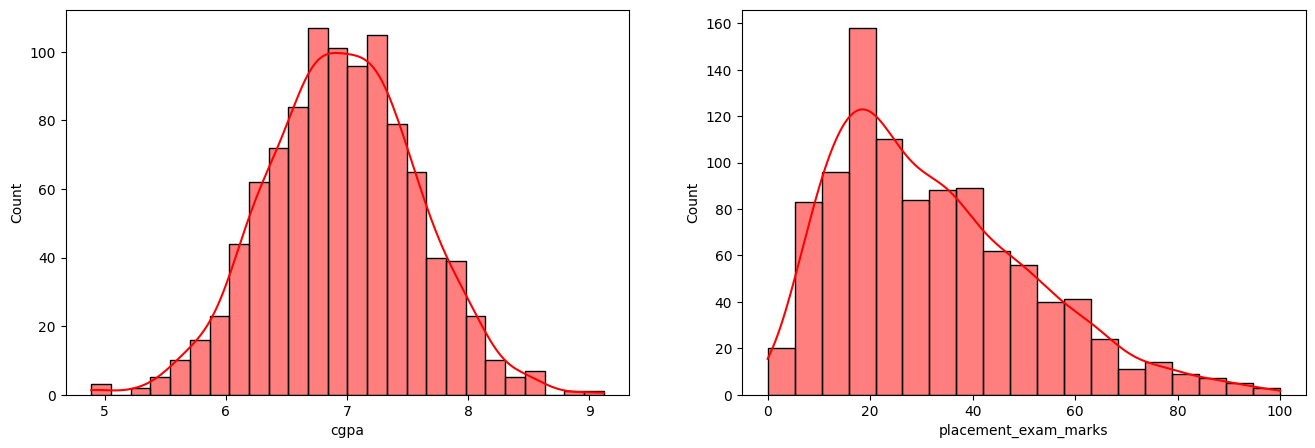

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='cgpa',kde=True,color="red")

plt.subplot(1,2,2)
sns.histplot(data=df,x='placement_exam_marks',kde=True,color="red")

plt.show()

In [49]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [50]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

##Ploting box-plot for "placement_exam_marks" column :-

<Axes: xlabel='placement_exam_marks'>

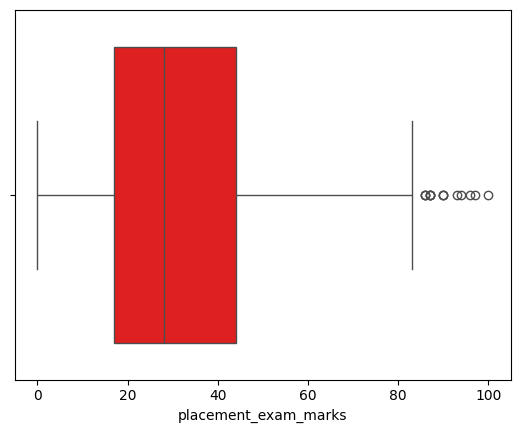

In [51]:
sns.boxplot(df['placement_exam_marks'],orient='h',color="red")

In [52]:
#Finding percentiles :
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [53]:
print("25th percentile : ",percentile25)
print("75th percentile : ",percentile75)

25th percentile :  17.0
75th percentile :  44.0


In [54]:
iqr = percentile75 - percentile25

In [55]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [56]:
print("Upper limit : ",upper_limit)
print("Lower limit : ",lower_limit)

Upper limit :  84.5
Lower limit :  -23.5


#Finding Outliers :-

In [57]:
#it gives the dataframe of outliers :
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [58]:
#It also gives the dataframe of outliers :
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


#Trimming :-

In [59]:
new_df = df[df['placement_exam_marks'] <= upper_limit]

In [60]:
new_df.shape

(985, 3)

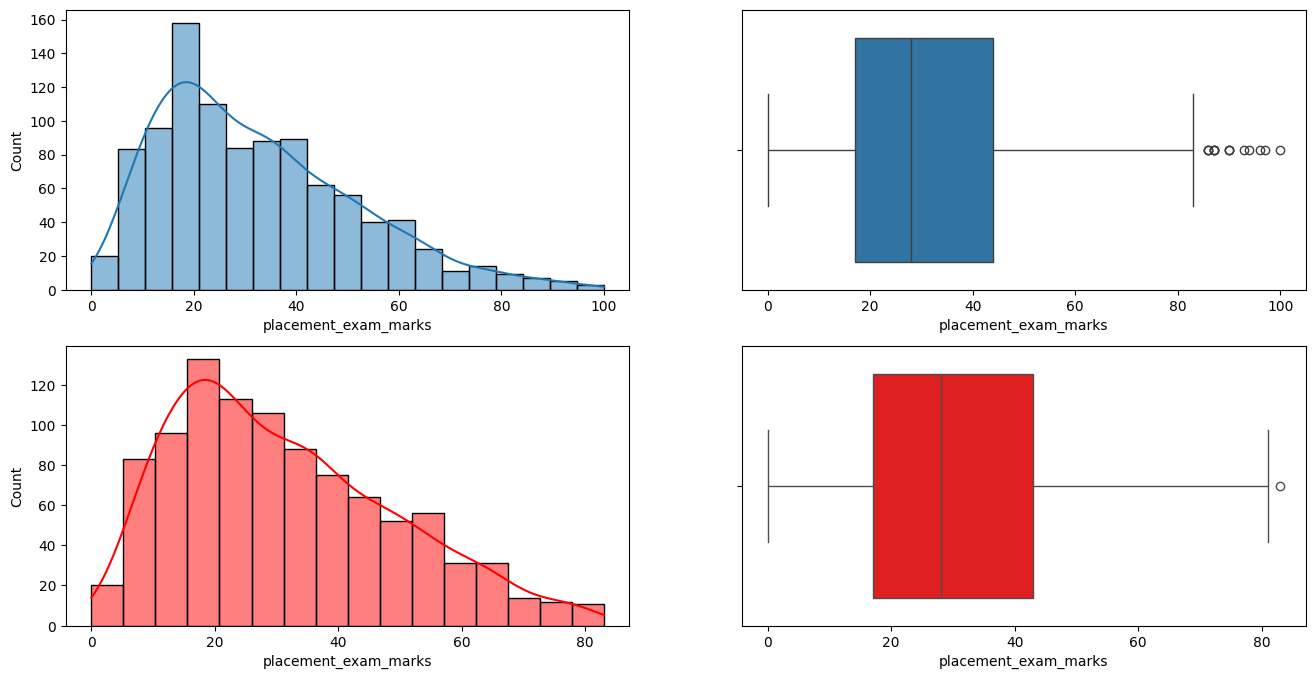

In [61]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data=df,x='placement_exam_marks',kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.histplot(data=new_df,x='placement_exam_marks',kde=True,color="red")

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],color="red",orient='h')

plt.show()

#Capping :-

In [62]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

###np.where(condtion,true,false)

In [63]:
new_df_cap.shape

(1000, 3)

<ipython-input-64-4336df809185>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-64-4336df809185>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


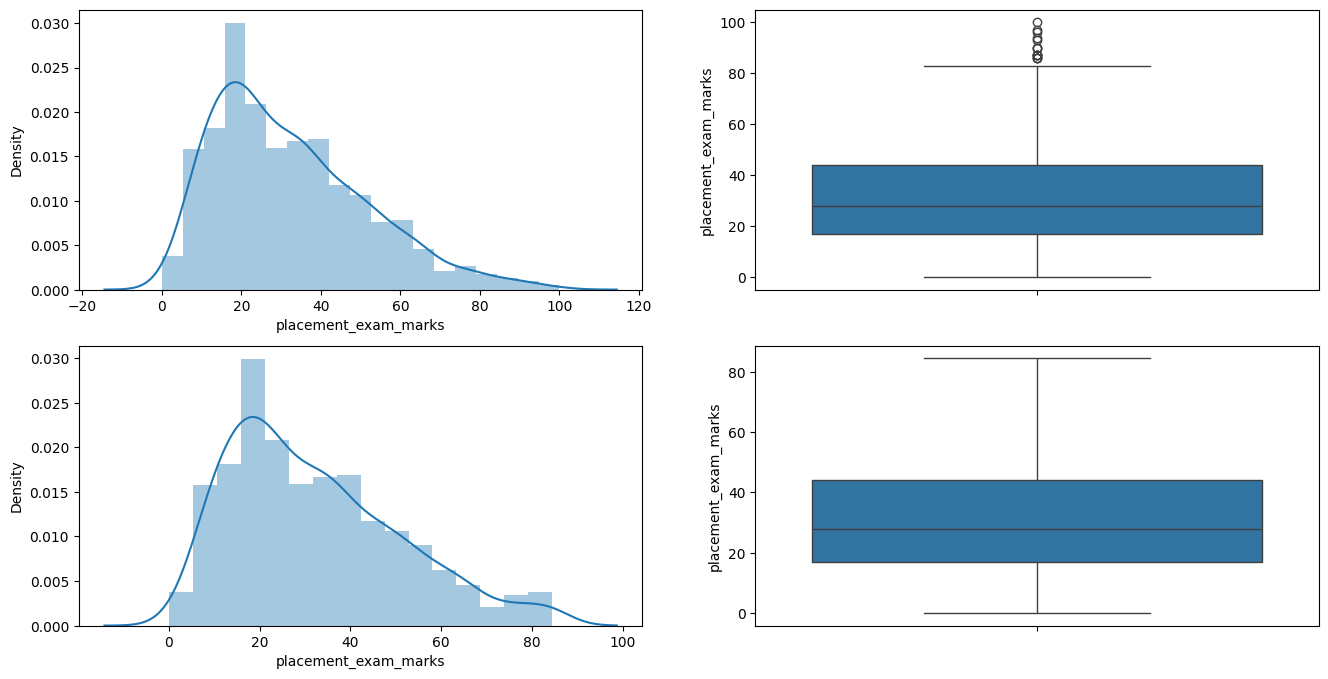

In [64]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

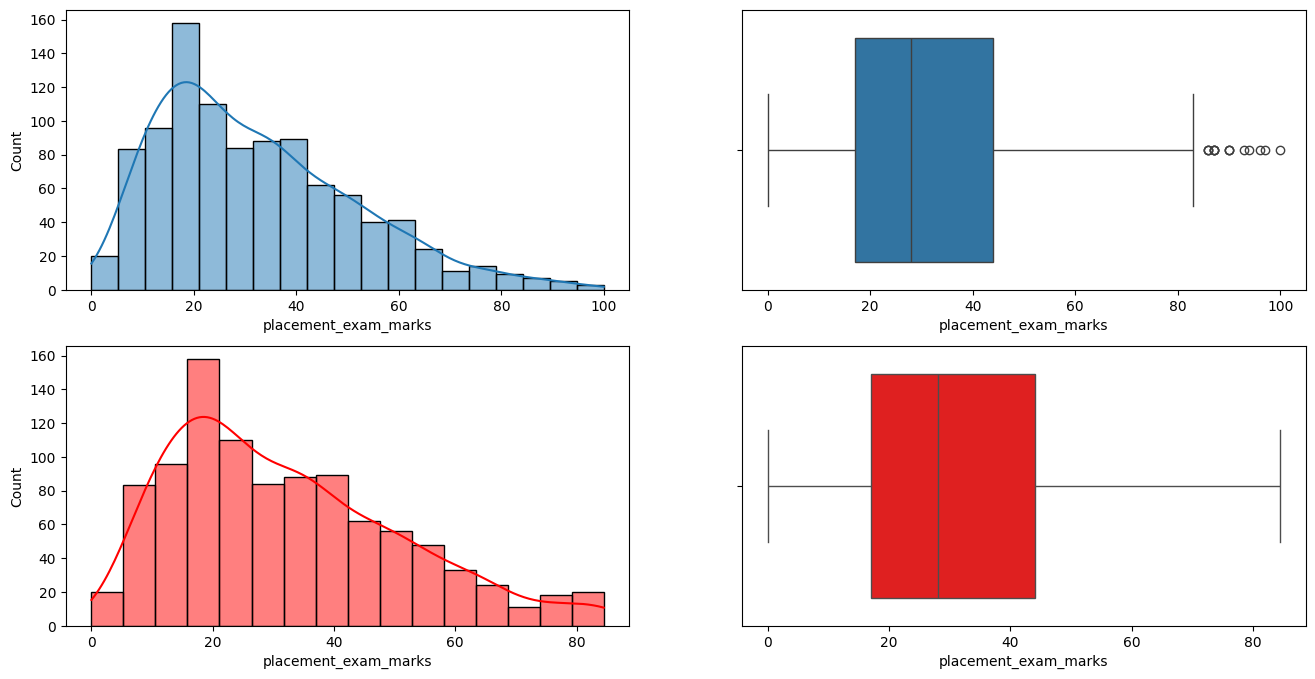

In [65]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data=df,x='placement_exam_marks',kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.histplot(data=new_df_cap,x='placement_exam_marks',kde=True,color="red")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'],color="red",orient='h')

plt.show()